In [1]:
#load dataset as a pandas dataframe
#task1: Import the data from daily-bike-share.csv and view the first few rows.
import pandas as pd
df = pd.read_csv('daily-bike-share.csv')

## Exploring the dataset

In [2]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.1+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
# The dataset has 14 columns, 731 rows
# No nulls detected
# No duplicates found
# The "instant" column is an incremental ID value that does not provide any predictive information and will be excluded from the dataset.

In [6]:
#keep a copy of the original dataset before processing
df_backup = df.copy()

In [7]:
df.drop(['instant'], axis=1, inplace=True)

In [8]:
# year column can be dropped as it doesn't hold any predictive value for future data.
df.drop(['yr'], axis=1, inplace=True)

In [9]:
df.sample(15)

,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
438,3/14/2012,1,3,0,3,1,1,0.572500,0.548617,0.507083,0.115062,997
423,2/28/2012,1,2,0,2,1,1,0.359167,0.353525,0.395833,0.193417,229
708,12/9/2012,4,12,0,0,0,2,0.384167,0.390146,0.905417,0.157975,441
691,11/22/2012,4,11,1,4,0,1,0.340000,0.350371,0.580417,0.052871,955
167,6/17/2011,2,6,0,5,1,1,0.649167,0.600383,0.735833,0.143029,863
425,3/1/2012,1,3,0,4,1,1,0.485833,0.475371,0.615417,0.226987,325
598,8/21/2012,3,8,0,2,1,1,0.649167,0.601025,0.673750,0.072771,1081
61,3/3/2011,1,3,0,4,1,1,0.198333,0.200133,0.318333,0.225754,123
395,1/31/2012,1,1,0,2,1,1,0.390000,0.381317,0.416667,0.261817,324
331,11/28/2011,4,11,0,1,1,1,0.503478,0.490122,0.743043,0.142122,253


In [10]:
# dteday column is fully described by yr, mnth and weekday columns, therefore can be excluded from the dataset
df.drop(['dteday'], axis=1, inplace=True)

In [11]:
# import libraries for visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [12]:
# task2.Create Histogram to visualise data  for feature 'temp' and 'windspeed’,
# and add lines for the Mean and Median on the plot.

def mean_med_hist(data:pd.Series):
    # Plotting the histogram
    plt.hist(data)

    # Calculate the mean and median
    mean = data.mean()
    median = data.median()

    # Add lines for mean and median
    plt.axvline(mean, color='r', linestyle='--', label='Mean')
    plt.axvline(median, color='g', linestyle='--', label='Median')

    # Adding labels, title, and legend
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Histogram')
    plt.legend()

    # Display the histogram
    plt.show()

Temperature distribution:


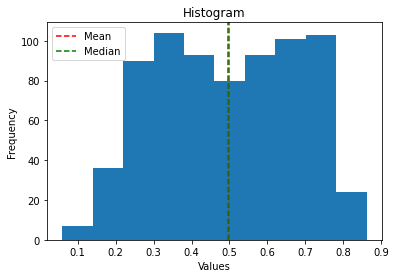

Windspeed distribution:


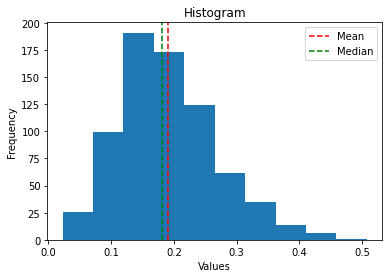

In [13]:
print('Temperature distribution:')
mean_med_hist(df['temp'])
print('Windspeed distribution:')
mean_med_hist(df['windspeed'])

### Discussion
Mean and median values for temp align, showing that values are evenly distributed.
The data has a uniform shape, although not following a normal distribution.
The shape can be explained considering it follows observations of a two year period, 
where the tips in the plot may explain the temperatures around summer and spring.

Windspeed values are not evenly distributed, which can be seen by the 
right skew of the distribution, and the deviation of the mean and median values from the centre.

# Explore relationships

In [14]:
# view correlations between features
df.corr()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
season,1.000000,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399
mnth,0.831440,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006
holiday,-0.010537,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274
weekday,-0.003080,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923
workingday,0.012485,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044
weathersit,0.019211,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353
temp,0.334315,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285
atemp,0.342876,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864
hum,0.205445,0.222204,-0.015937,-0.052232,0.024327,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008
windspeed,-0.229046,-0.207502,0.006292,0.014282,-0.018796,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.167613


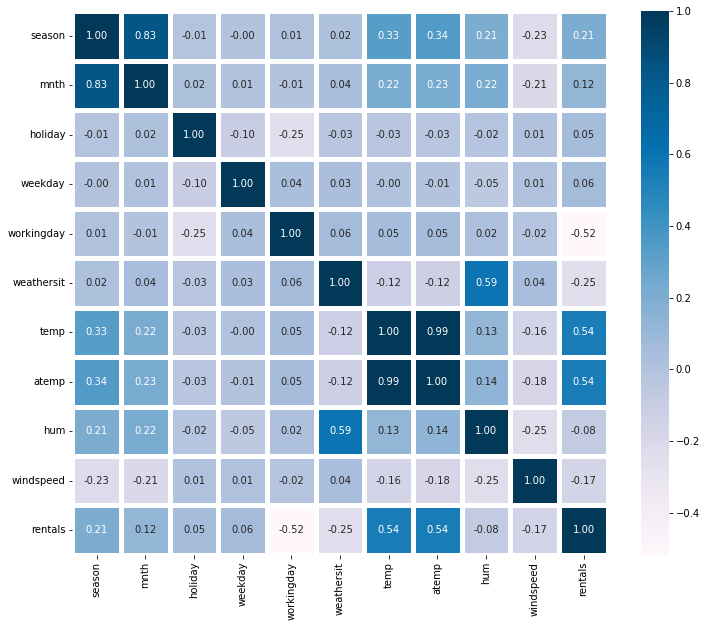

In [15]:
# Get a clearer view by visualising with a heatmap

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cbar=True, cmap='PuBu', linewidth=5, fmt=".2f")
plt.show()

In [16]:
df.corr()['rentals'].sort_values(ascending=False)

rentals       1.000000
atemp         0.543864
temp          0.543285
season        0.210399
mnth          0.123006
weekday       0.059923
holiday       0.054274
hum          -0.077008
windspeed    -0.167613
weathersit   -0.247353
workingday   -0.518044
Name: rentals, dtype: float64

##### The features "temp" and "atemp" demonstrate a strong correlation,
##### which can potentially introduce multicollinearity concerns in the analysis. 
##### However, to gain a deeper understanding of the model performance and  
##### assess its impact, both features will be retained for further exploration.

In [17]:
#df.drop(['temp'], axis=1, inplace=True)

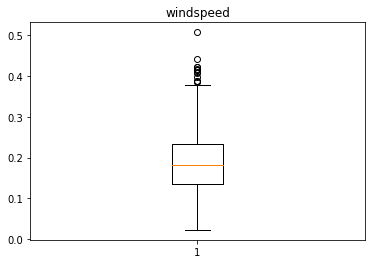

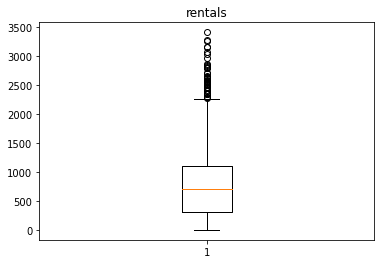

In [18]:
# search for outliers in non-binary/categorical columns
for column in df[['windspeed', 'rentals']]:
    # Create a box plot for the current feature
    plt.figure()  # Create a new figure for each box plot
    plt.boxplot(df[column])
    plt.title(column)  # Set the title of the box plot as the feature name
    plt.show()  # Display the box plot

Both features exhibit a skewed distribution, with a noticeable presence of outliers

In [19]:
from scipy.stats.mstats import winsorize

In [20]:
# handle outliers via winsorisation (reduce values within acceptable range) 
df.windspeed = winsorize(df['windspeed'], limits=[0, 0.1])

In [21]:
df.rentals = winsorize(df['rentals'], limits=[0, 0.1])

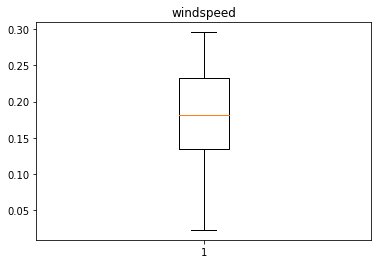

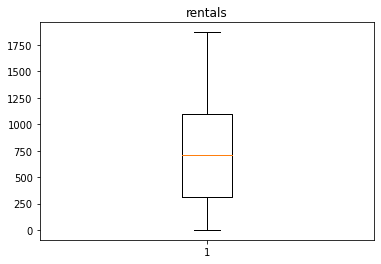

In [22]:
# ensure outliers have been treated
for column in df[['windspeed', 'rentals']]:
    plt.figure() 
    plt.boxplot(df[column])
    plt.title(column) 
    plt.show()

In [23]:
#### Create interaction feature to explore non-working day with high temperature relationship

In [24]:
#create "non-working day" feature by reversing the values of working day
nonworkingday = df['workingday'].apply(lambda x: 1 - x)
#interraction term
df['nonwork_temp_interaction'] = nonworkingday * df['atemp']

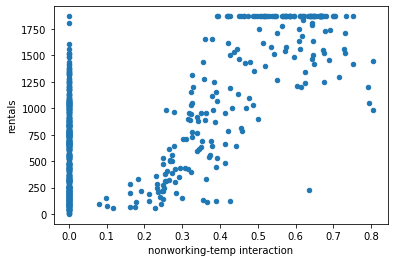

In [25]:
df.plot.scatter(x='nonwork_temp_interaction', y='rentals')

plt.xlabel('nonworking-temp interaction')  # Specify the label for the x-axis
plt.ylabel('rentals')  # Specify the label for the y-axis
plt.show()

The relationship depicted in the above diagram may appear complex to interpret. However, it is evident that the non-zero values of the interaction feature, which represent non-working days with various average temperatures, show an almost linear patern with rentals as the average temperatures increase.

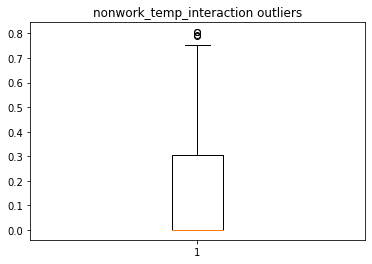

In [26]:
plt.boxplot(df['nonwork_temp_interaction'])
plt.title('nonwork_temp_interaction outliers')  # Set the title of the box plot as the feature name
plt.show()  # Display the box plot

In [27]:
df.nonwork_temp_interaction = winsorize(df['nonwork_temp_interaction'], limits=[0, 0.1])

In [28]:
df.corr()['rentals'].sort_values(ascending=False)

rentals                     1.000000
nonwork_temp_interaction    0.656414
atemp                       0.608720
temp                        0.608718
season                      0.249619
mnth                        0.151078
holiday                     0.045484
weekday                     0.044510
hum                        -0.072554
windspeed                  -0.165560
weathersit                 -0.273851
workingday                 -0.494498
Name: rentals, dtype: float64

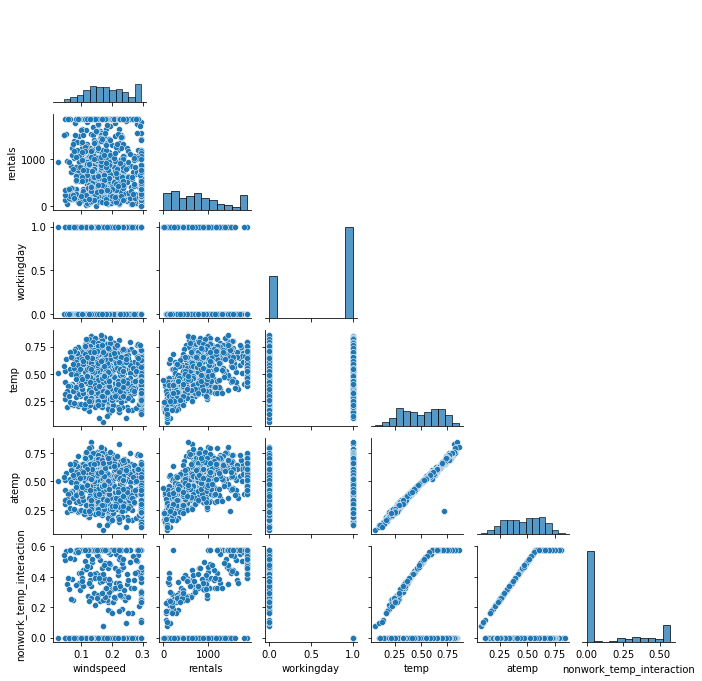

In [29]:
sns.pairplot(df[['windspeed', 'rentals', 'workingday', 'temp', 'atemp', 'nonwork_temp_interaction']],corner=True, height=1.6)

In [30]:
# task 3.Separate feature and target
y = df['rentals']
X = df.drop(['rentals'], axis=1)

In [31]:
# task 4.Split 70% data for training and 30% testing. 
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [33]:
# 5. Use suitable machine learning techniques to model the data set

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
# create Linear Regression model and train it
lr_model = LinearRegression()

In [36]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [37]:
#assign predicted values to variable
y_pred = lr_model.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [39]:
# create function for model metrics
def print_model_metrics(y_test, y_pred):

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    explained_variance = explained_variance_score(y_test, y_pred)
    print(f'mean squared error: {mse}')
    print(f'mean absolute error: {mae}')
    print(f'R2 score: {r2}')
    print(f'explained variance: {explained_variance}')

In [40]:
print_model_metrics(y_test, y_pred)

mean squared error: 65793.24855425056
mean absolute error: 197.41462480085116
R2 score: 0.7917111896593119
explained variance: 0.7935999598753529


# discussion

    Mean Squared Error (MSE): The model has an MSE of 86315.78, 
    which indicates the average squared difference between the predicted and actual values is relatively high.

    Mean Absolute Error (MAE): The model has an MAE of 211,
    which represents the average absolute difference between the predicted and actual values. 
    On average, the predicted values deviate from the actual values by approximately 211 units.

    R-squared (R2) Score: The R-squared score is 0.72, which means that approximately 72% of
    the variance in the dependent variable can be explained by the independent variables included in the model.
    This indicates a moderate level of predictive power.

    Explained Variance Score: The explained variance score is 0.72,
    indicating that around 72% of the variance in the dependent variable is explained by the independent variables.
    This metric provides a similar interpretation to the R-squared score.


### Test model with normalised data

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler

In [42]:
# normalise data by subtracting the median and deviding by IQR
# suitable for datasets that contain outliers or have non-normal distributions
scaler = RobustScaler()
X_normalised = scaler.fit_transform(X)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=.3)

In [44]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [45]:
y_pred = lr_model.predict(X_test)

In [46]:
print_model_metrics(y_test, y_pred)

mean squared error: 82702.7923560364
mean absolute error: 215.0005485549423
R2 score: 0.7225945903432112
explained variance: 0.7258158618714718


In [47]:
coefficients = lr_model.coef_
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coefficients_df

,Feature,Coefficient
0,season,61.539170
1,mnth,-90.428540
2,holiday,-231.481563
3,weekday,40.489797
4,workingday,320.030519
5,weathersit,-84.906245
6,temp,-126.266305
7,atemp,516.565340
8,hum,-98.072995
9,windspeed,-66.381915


In [137]:
# work with a copy of the original dataset
df2 = df.copy()
# drop correlated independent feature to reduce multicollinearity
df2.drop(['temp'], axis=1, inplace=True)
# assign X and y variables
y = df2['rentals']
X = df2.drop(['rentals'], axis=1)
# normalise independent features
X_normalised = scaler.fit_transform(X)
# split the data, set test size to 30%
X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=.3, random_state=433)

In [49]:
# Try additional regression models
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [50]:

# Define the parameter grid
param_grid = {
    # strength of regularisation
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0], 
    # ration between L1 and L2 regularisation. 0 = purely L2
    'l1_ratio': [0.1, 0.5, 0.9, 1]
}
elastic_net = ElasticNet()

In [51]:
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, cv=10)

# Fit the model to the data
grid_search.fit(X_normalised, y)

# Print the best hyperparameters
print("Best alpha:", grid_search.best_params_['alpha'])
print("Best l1_ratio:", grid_search.best_params_['l1_ratio'])

Best alpha: 1.0
Best l1_ratio: 1


In [52]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [53]:
print_model_metrics(y_pred, y_test)

mean squared error: 64402.234756163365
mean absolute error: 183.38191228410076
R2 score: 0.7030469545174085
explained variance: 0.7030712679497264


In [54]:
# import required libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [55]:
# Define the Ridge Regression model
ridge = Ridge()

# Define the hyperparameters to search over
param_grid = {
    # regularisation strength range
    'alpha': [0, 0.1, 1.0, 10.0],
    # solver algorithms set
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Perform grid search using cross-validation over 5 folds
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_normalised, y)

# Get the best Ridge Regression model
best_ridge_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_ridge_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

In [56]:
print_model_metrics(y_test, y_pred)

mean squared error: 64265.51274382316
mean absolute error: 183.25956036940224
R2 score: 0.7893274842193094
explained variance: 0.7893567345202945


In [57]:
# acquire optimal parameters
grid_search.best_params_

{'alpha': 1.0, 'solver': 'auto'}

In [58]:
# display coefficients for Ridge model
coefficients = grid_search.best_estimator_.coef_
coefficients_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
coefficients_df

,Feature,Coefficient
0,season,54.669281
1,mnth,-64.146948
2,holiday,-175.917336
3,weekday,67.593790
4,workingday,248.427452
5,weathersit,-104.222470
6,atemp,410.520240
7,hum,-100.781097
8,windspeed,-67.761851
9,nonwork_temp_interaction,613.922357


### Polynomial Regression 

In [241]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

degree = 2  # Set the degree of polynomial
poly_features = PolynomialFeatures(degree=degree)

X_train, X_test, y_train, y_test = train_test_split(X_normalised, y, test_size=.2)
lr = LinearRegression()
# create pipeline with polynomial and linear models
pipeline = make_pipeline(poly_features, lr)

In [242]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [243]:
y_pred = pipeline.predict(X_test)
print_model_metrics(y_test, y_pred)

mean squared error: 1.3901674651551024e-29
mean absolute error: 2.5115045178682595e-15
R2 score: 1.0
explained variance: 1.0


### Classification example with Logistic Regression

#### Creating a Classification model that predicts the season

In [269]:
# define predictor
X = df.drop(['season'], axis=1)

In [254]:
# set season as target value
y = df.season 

In [262]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [263]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the Logistic Regression model
logistic_regression = LogisticRegression()

# Define the hyperparameters to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear']
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best Logistic Regression model
best_logistic_regression = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_logistic_regression.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')



In [264]:
accuracy

0.8503401360544217

In [265]:
precision

0.8503401360544217

In [266]:
recall

0.8503401360544217

In [267]:
f1

0.8503401360544217

In [ ]:
# End of file